https://www.researchgate.net/post/How_can_I_find_my_icorr_and_Ecorr_from_tafel_plot
To work out your Icorrs, simply extrapolate the linear portions of the anodic and cathodic reactions to the corrosion potential (Ecorr). If the anodic and cathodic Tafel lines have an equal gradient, then the Icorr is the current at the intersection of these two lines.

In [120]:
#Installing the necesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [121]:
pd.set_option("display.max_rows", None)

In [122]:
df_base = pd.read_excel('../Data/EIS_bode/base.xlsx') 
df_ht = pd.read_excel('../Data/EIS_bode/ht.xlsx') 
df_sp = pd.read_excel('../Data/EIS_bode/sp.xlsx') 
df_htsp = pd.read_excel('../Data/EIS_bode/htsp.xlsx') 

In [123]:
df_base.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3'], dtype='object')

In [124]:
df_htsp.shape

(72, 4)

In [125]:
#Dataframe is sliced to only take from the second column onwards and same further
df_base = df_base.iloc[2:]

In [126]:
df_base.head(1)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
2,100100,27.6,100100.0,-1.548


In [127]:
df_ht.columns

Index(['XY', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3'], dtype='object')

In [128]:
df_ht = df_ht.iloc[1:]

In [129]:
df_sp = df_sp.iloc[2:]

In [130]:
df_htsp = df_htsp.iloc[1:]

## Adding the postprocessing feature columns in the datatset

In [131]:
# The column 0 is renamed with XY for base and sp
df_base = df_base.rename(columns={"Unnamed: 0": "XY"})
df_sp = df_sp.rename(columns={"Unnamed: 0": "XY"})

In [132]:
df_base.columns

Index(['XY', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3'], dtype='object')

In [133]:
#The dataframe base get new columns with ceros names T, t, incl and vel
df_base["T"] = 0*np.ones((df_base.shape[0],1))
df_base["t"] = 0*np.ones((df_base.shape[0],1))
df_base["incl"] = 0*np.ones((df_base.shape[0],1))
df_base["vel"] = 0*np.ones((df_base.shape[0],1))

In [134]:
df_base.head()

,XY,Unnamed: 1,Unnamed: 2,Unnamed: 3,T,t,incl,vel
2,100100,27.6,100100.0,-1.548,0.0,0.0,0.0,0.0
3,79450,27.66,79450.0,-1.663,0.0,0.0,0.0,0.0
4,63140,27.59,63140.0,-1.715,0.0,0.0,0.0,0.0
5,50200,27.67,50200.0,-1.856,0.0,0.0,0.0,0.0
6,39890,27.75,39890.0,-2.169,0.0,0.0,0.0,0.0


In [135]:
df_base["T"].unique()

array([0.])

In [136]:
#Now there again a series of columns are created with values 980, 15 and cero
df_ht["T"] = 980*np.ones((df_ht.shape[0],1))
df_ht["t"] = 15*np.ones((df_ht.shape[0],1))
df_ht["incl"] = 0*np.ones((df_ht.shape[0],1))
df_ht["vel"] = 0*np.ones((df_ht.shape[0],1))

In [137]:
df_ht.head()

,XY,Unnamed: 1,Unnamed: 2,Unnamed: 3,T,t,incl,vel
1,100100.0,31.12,100100.0,-1.249,980.0,15.0,0.0,0.0
2,79450.0,31.09,79450.0,-1.1,980.0,15.0,0.0,0.0
3,63140.0,31.12,63140.0,-1.022,980.0,15.0,0.0,0.0
4,50200.0,31.17,50200.0,-1.169,980.0,15.0,0.0,0.0
5,39890.0,31.16,39890.0,-1.208,980.0,15.0,0.0,0.0


In [138]:
# SP get new columns same as base fill with cero value, 60 and 70
df_sp["T"] = 0*np.ones((df_sp.shape[0],1))
df_sp["t"] = 0*np.ones((df_sp.shape[0],1))
df_sp["incl"] = 60*np.ones((df_sp.shape[0],1))
df_sp["vel"] = 70*np.ones((df_sp.shape[0],1))

In [139]:
df_htsp["T"] = 980*np.ones((df_htsp.shape[0],1))
df_htsp["t"] = 15*np.ones((df_htsp.shape[0],1))
df_htsp["incl"] = 60*np.ones((df_htsp.shape[0],1))
df_htsp["vel"] = 70*np.ones((df_htsp.shape[0],1))

In [140]:
# unnamed 2 corresponds to x axis df_base and it is converted to logaritm of frecuency
np.log(df_base["Unnamed: 2"].values)
# y VARIABLe corresponds to unname 3 or phase angle,but it doesnt make sense that they managed  to make a plot with this data if the datatype is object. Re-reading the literature, actually matplotlib.pyplot can do it.
df_base["Unnamed: 3"].values

array([-1.548, -1.663, -1.715, -1.856, -2.169, -2.513, -2.651, -3.134,
       -3.747, -4.682, -5.326, -6.516, -7.851, -9.658, -11.31, -13.5,
       -16.43, -19.66, -23.03, -27.16, -31.08, -35.85, -40.61, -44.98,
       -49.56, -53.68, -57.25, -60.62, -63.36, -65.74, -67.65, -69.36,
       -70.63, -71.77, -72.59, -73.26, -73.81, -74.31, -74.65, -74.85,
       -74.98, -75.06, -75.09, -75.1, -75.08, -75.04, -74.86, -74.77,
       -74.64, -74.49, -74.31, -74.1, -73.84, -73.53, -73.15, -72.66,
       -72.1, -71.39, -70.52, -69.49, -68.26, -66.73, -64.91, -62.78,
       -60.38, -57.68, -54.7, -51.52, -48.13, -44.73, -41.26],
      dtype=object)

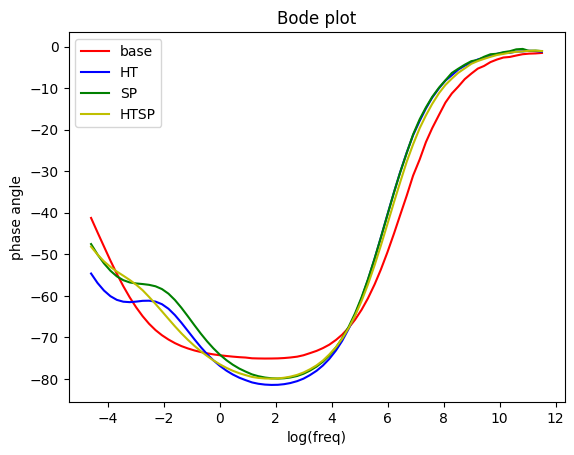

In [141]:
plt.plot(np.log(df_base["Unnamed: 2"].values),df_base["Unnamed: 3"].values,'r',label = 'base')
plt.plot(np.log(df_ht["Unnamed: 2"].values),df_ht["Unnamed: 3"].values,'b',label = 'HT')
plt.plot(np.log(df_sp["Unnamed: 2"].values),df_sp["Unnamed: 3"].values,'g',label = 'SP')
plt.plot(np.log(df_htsp["Unnamed: 2"].values),df_htsp["Unnamed: 3"].values,'y',label = 'HTSP')
plt.legend()
plt.title('Bode plot')
plt.xlabel('log(freq)')
plt.ylabel('phase angle')
plt.show()

In [142]:
df_base.columns

Index(['XY', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'T', 't', 'incl',
       'vel'],
      dtype='object')

In [143]:
df_base = df_base.rename(columns={"Unnamed: 1":"absZ","Unnamed: 3": "phase","Unnamed: 2":"f"})
df_ht = df_ht.rename(columns={"Unnamed: 1":"absZ","Unnamed: 3": "phase","Unnamed: 2":"f"})
df_sp = df_sp.rename(columns={"Unnamed: 1":"absZ","Unnamed: 3": "phase","Unnamed: 2":"f"})
df_htsp = df_htsp.rename(columns={"Unnamed: 1":"absZ","Unnamed: 3": "phase","Unnamed: 2":"f"})

In [144]:
df_base.head()

,XY,absZ,f,phase,T,t,incl,vel
2,100100,27.6,100100.0,-1.548,0.0,0.0,0.0,0.0
3,79450,27.66,79450.0,-1.663,0.0,0.0,0.0,0.0
4,63140,27.59,63140.0,-1.715,0.0,0.0,0.0,0.0
5,50200,27.67,50200.0,-1.856,0.0,0.0,0.0,0.0
6,39890,27.75,39890.0,-2.169,0.0,0.0,0.0,0.0


In [145]:
# for all treatment methods, the feature frecuency is being transformed to logaritm
df_base["f"] = np.log(df_base["f"].values)
df_ht["f"] = np.log(df_ht["f"].values)
df_sp["f"] = np.log(df_sp["f"].values)
df_htsp["f"] = np.log(df_htsp["f"].values)

In [146]:
# for all treatment methods, the feature absZ is being transformed to logaritm
df_base["absZ"] = np.log(df_base["absZ"].astype('float64').values)
df_ht["absZ"] = np.log(df_ht["absZ"].astype('float64').values)
df_sp["absZ"] = np.log(df_sp["absZ"].astype('float64').values)
df_htsp["absZ"] = np.log(df_htsp["absZ"].astype('float64').values)

In [147]:
df_base = df_base.rename(columns={"f":"log(f)","absZ":"log(absZ)"})
df_ht = df_ht.rename(columns={"f":"log(f)","absZ":"log(absZ)"})
df_sp = df_sp.rename(columns={"f":"log(f)","absZ":"log(absZ)"})
df_htsp = df_htsp.rename(columns={"f":"log(f)","absZ":"log(absZ)"})

In [148]:
df_base.columns

Index(['XY', 'log(absZ)', 'log(f)', 'phase', 'T', 't', 'incl', 'vel'], dtype='object')

In [149]:
df_base.dtypes

XY            object
log(absZ)    float64
log(f)       float64
phase         object
T            float64
t            float64
incl         float64
vel          float64
dtype: object

In [150]:
df_ht["phase"].dtypes

dtype('O')

In [151]:
result_df = pd.concat([df_base,df_ht,df_sp,df_htsp])

In [152]:
result_df.shape

(284, 8)

In [153]:
result_df

,XY,log(absZ),log(f),phase,T,t,incl,vel
2,100100,3.317816,11.513925,-1.548,0.0,0.0,0.0,0.0
3,79450,3.319987,11.282883,-1.663,0.0,0.0,0.0,0.0
4,63140,3.317453,11.053110,-1.715,0.0,0.0,0.0,0.0
5,50200,3.320349,10.823770,-1.856,0.0,0.0,0.0,0.0
6,39890,3.323236,10.593881,-2.169,0.0,0.0,0.0,0.0
7,31640,3.324676,10.362177,-2.513,0.0,0.0,0.0,0.0
8,25170,3.326115,10.133408,-2.651,0.0,0.0,0.0,0.0
9,20020,3.328627,9.904487,-3.134,0.0,0.0,0.0,0.0
10,15890,3.334701,9.673445,-3.747,0.0,0.0,0.0,0.0
11,12610,3.335058,9.442245,-4.682,0.0,0.0,0.0,0.0


In [154]:
# AS phase was an object it was ok for plotting but to make the models it is necesary to change it to float type
result_df["phase"] = result_df["phase"].values.astype('float64')

In [155]:
result_df["phase"].head()

2   -1.548
3   -1.663
4   -1.715
5   -1.856
6   -2.169
Name: phase, dtype: float64

In [195]:
result_df.head()

,log(absZ),log(f),phase,T,t,incl,vel
2,3.317816,11.513925,-1.548,0.0,0.0,0.0,0.0
3,3.319987,11.282883,-1.663,0.0,0.0,0.0,0.0
4,3.317453,11.053110,-1.715,0.0,0.0,0.0,0.0
5,3.320349,10.823770,-1.856,0.0,0.0,0.0,0.0
6,3.323236,10.593881,-2.169,0.0,0.0,0.0,0.0


In [156]:
# Now some columns are drop
result_df = result_df.drop(['XY'], axis=1)

In [157]:
# A new dataframe is made from the result_df concatenated df by dropin XY and log absZ
phase_df = result_df.drop(['log(absZ)'], axis=1)

In [196]:
phase_df.head()

,log(f),phase,T,t,incl,vel
2,11.513925,-1.548,0.0,0.0,0.0,0.0
3,11.282883,-1.663,0.0,0.0,0.0,0.0
4,11.053110,-1.715,0.0,0.0,0.0,0.0
5,10.823770,-1.856,0.0,0.0,0.0,0.0
6,10.593881,-2.169,0.0,0.0,0.0,0.0


In [158]:
absZ_df = result_df.drop(['log(f)'], axis=1)

In [159]:
phase_df.shape

(284, 6)

In [160]:
print_df = phase_df.rename(columns={'phase':'phase_angle'})

In [161]:
print_df.head()

,log(f),phase_angle,T,t,incl,vel
2,11.513925,-1.548,0.0,0.0,0.0,0.0
3,11.282883,-1.663,0.0,0.0,0.0,0.0
4,11.053110,-1.715,0.0,0.0,0.0,0.0
5,10.823770,-1.856,0.0,0.0,0.0,0.0
6,10.593881,-2.169,0.0,0.0,0.0,0.0


In [162]:
print_df.to_csv('Bode_data.csv',index=False)

In [197]:
phase_df.head()

,log(f),phase,T,t,incl,vel
2,11.513925,-1.548,0.0,0.0,0.0,0.0
3,11.282883,-1.663,0.0,0.0,0.0,0.0
4,11.053110,-1.715,0.0,0.0,0.0,0.0
5,10.823770,-1.856,0.0,0.0,0.0,0.0
6,10.593881,-2.169,0.0,0.0,0.0,0.0


In [163]:
x, y = phase_df.drop(['phase'], axis=1), phase_df['phase'].values.astype('float64')

In [203]:
# x are 5 features from which the target (phase) would be predicted, the observations coming from 4 different treatments
# base= no treatment, ht= heat treatment, sp=shot peening treatment, htsp= combined treatment of shot peening and heat treatment
x.columns

Index(['log(f)', 'T', 't', 'incl', 'vel'], dtype='object')

|Feature|Values unique | Heat treatment temperature|
|-|-|-|
|T |0, 980 | Heat treatment temperature|
|t |0, 15 | Heat treatment duration|
|incl |0, 60 | shot peening inclination|
|vel |0, 70 | shot peening velocity|

In [211]:
#original article said that shot peening inclination varied from 0 to 45 degrees, but here it is 0 and 60 degrees
x["incl"].unique()

array([ 0., 60.])

In [214]:
y.shape[0]

284

In [200]:
# y are the values of phase
y[0:2]

array([-1.548, -1.663])

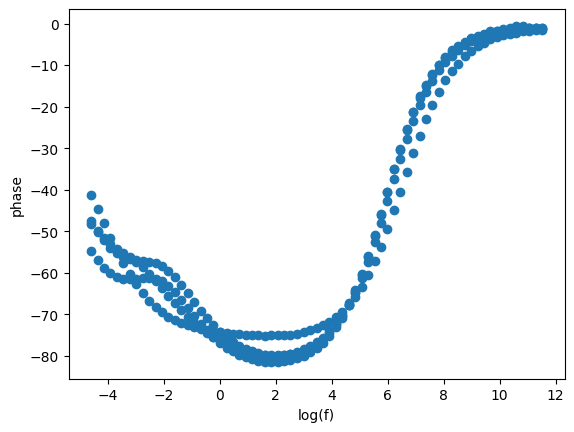

In [212]:
plt.scatter(phase_df['log(f)'], phase_df['phase'])
plt.xlabel("log(f)")
plt.ylabel("phase");

In [221]:
x_test.columns

Index(['log(f)', 'T', 't', 'incl', 'vel'], dtype='object')

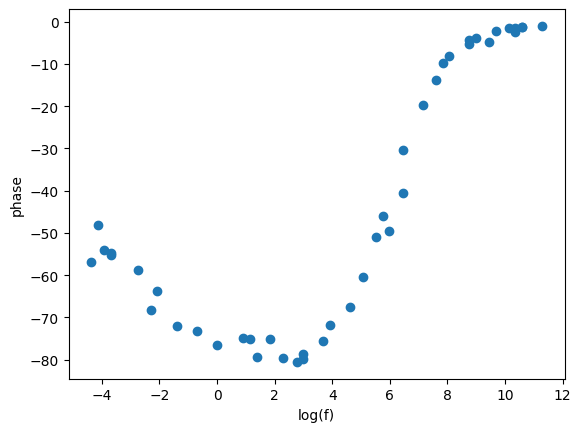

In [227]:
plt.scatter(x_test['log(f)'], y_test)
plt.xlabel("log(f)")
plt.ylabel("phase");

## Fitting a XGboost Model 

In [193]:
import xgboost as xgb

In [194]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)
xgb_model = xgb.XGBRegressor(random_state = 0)
xgb_model.fit(x_train,y_train)
#R2
#MAE
#RMSE
print(r2_score(y_test,xgb_model.predict(x_test)))
print(mean_absolute_error(y_test,xgb_model.predict(x_test)))
print(sqrt(mean_squared_error(y_test,xgb_model.predict(x_test))))

0.9981340820596217
0.800459029366249
1.306168529640589


In [166]:
xgb_model.get_params()

{'objective': 'reg:squarederror',
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 6,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

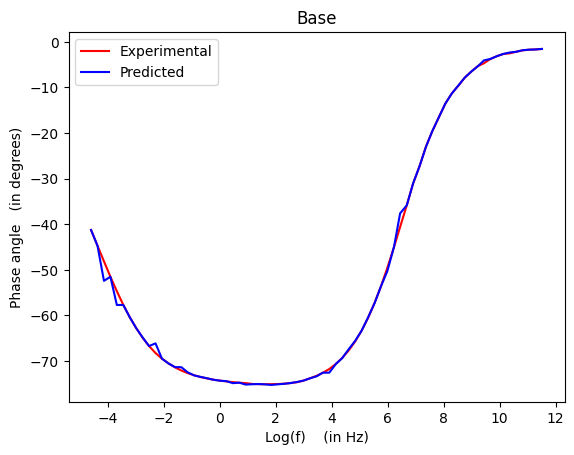

In [228]:
plt.plot(df_base["log(f)"].values,df_base["phase"].values,'r',label = 'Experimental')
plt.plot(df_base["log(f)"].values,xgb_model.predict(df_base.drop(['XY','log(absZ)','phase'],axis=1)),'b',label='Predicted')
plt.legend()
plt.xlabel("Log(f)    (in Hz)")
plt.ylabel("Phase angle   (in degrees)")
plt.title('Base')
#plt.savefig('bode_xgb_ab.png',dpi=1200)
plt.show()

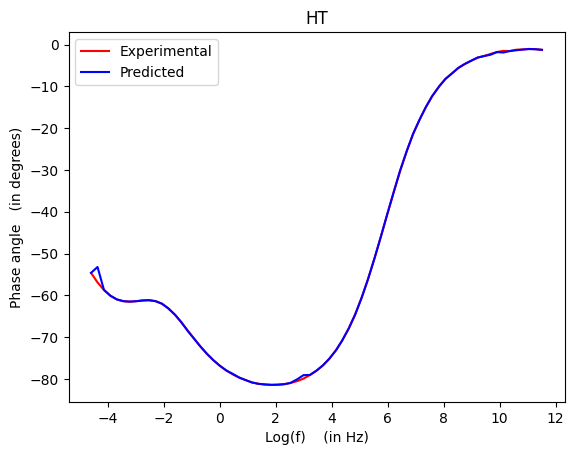

In [229]:
plt.plot(df_ht["log(f)"].values,df_ht["phase"].values,'r',label = 'Experimental')
plt.plot(df_ht["log(f)"].values,xgb_model.predict(df_ht.drop(['XY','log(absZ)','phase'],axis=1)),'b',label='Predicted')
plt.legend()
plt.xlabel("Log(f)    (in Hz)")
plt.ylabel("Phase angle   (in degrees)")
plt.title('HT')
#plt.savefig('bode_xgb_ht.png',dpi=1200)
plt.show()

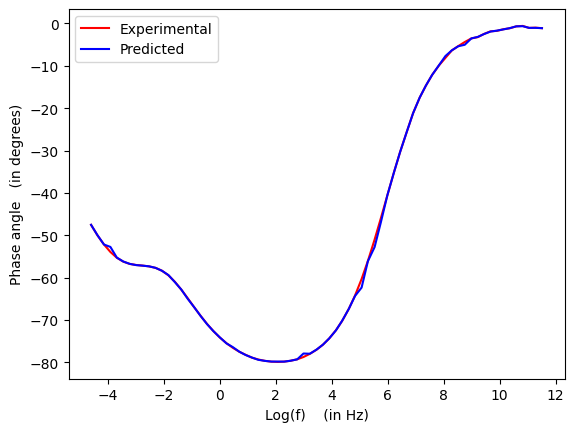

In [169]:
plt.plot(df_sp["log(f)"].values,df_sp["phase"].values,'r',label = 'Experimental')
plt.plot(df_sp["log(f)"].values,xgb_model.predict(df_sp.drop(['XY','log(absZ)','phase'],axis=1)),'b',label='Predicted')
plt.legend()
plt.xlabel("Log(f)    (in Hz)")
plt.ylabel("Phase angle   (in degrees)")
plt.title('SP')
#plt.savefig('bode_xgb_sp.png',dpi=1200)
plt.show()

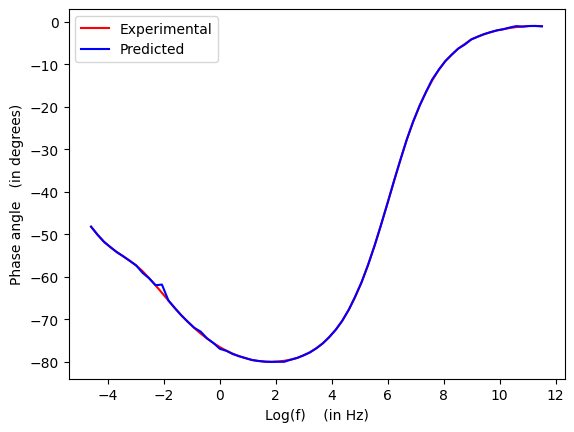

In [170]:
plt.plot(df_htsp["log(f)"].values,df_htsp["phase"].values,'r',label = 'Experimental')
plt.plot(df_htsp["log(f)"].values,xgb_model.predict(df_htsp.drop(['XY','log(absZ)','phase'],axis=1)),'b',label='Predicted')
plt.legend()
plt.xlabel("Log(f)    (in Hz)")
plt.ylabel("Phase angle   (in degrees)")
plt.title('htsp')
# plt.savefig('bode_xgb_htsp.png',dpi=1200)
plt.show()

## Fitting a Support Vector Regression

In [215]:
from sklearn import svm
svr_model = svm.SVR(kernel='rbf', C=4, gamma=0.1, epsilon=.1,degree=3)
svr_model.fit(x_train,y_train)
#R2
#MAE
#RMSE
print(r2_score(y_test,svr_model.predict(x_test)))
print(mean_absolute_error(y_test,svr_model.predict(x_test)))
print(sqrt(mean_squared_error(y_test,svr_model.predict(x_test))))

0.9929735831671481
1.6210281576454169
2.5346611061015922


In [216]:
svr_model.get_params()

{'C': 4,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 0.1,
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

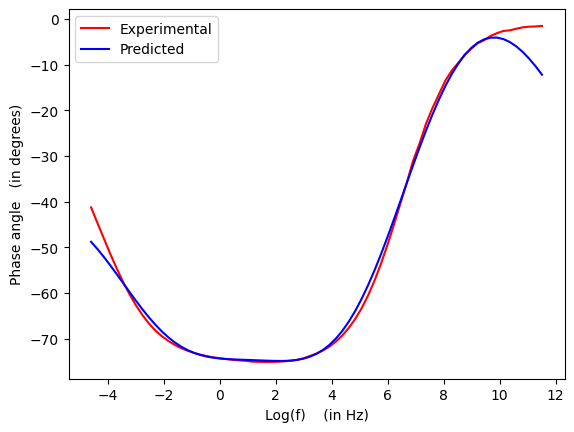

In [173]:
plt.plot(df_base["log(f)"].values,df_base["phase"].values,'r',label = 'Experimental')
plt.plot(df_base["log(f)"].values,svr_model.predict(df_base.drop(['XY','log(absZ)','phase'],axis=1)),'b',label='Predicted')
plt.legend()
plt.xlabel("Log(f)(in Hz)")
plt.ylabel("Phase angle (in degrees)")
plt.title('Base')
#plt.savefig('bode_svm_ab.png',dpi=1200)
plt.show()

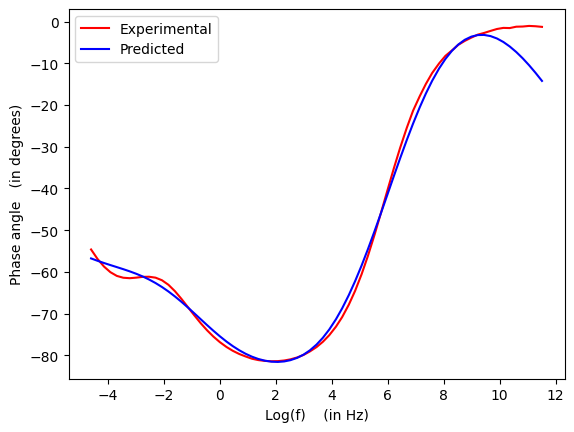

In [174]:
plt.plot(df_ht["log(f)"].values,df_ht["phase"].values,'r',label = 'Experimental')
plt.plot(df_ht["log(f)"].values,svr_model.predict(df_ht.drop(['XY','log(absZ)','phase'],axis=1)),'b',label='Predicted')
plt.legend()
plt.xlabel("Log(f)    (in Hz)")
plt.ylabel("Phase angle   (in degrees)")
plt.title('ht')
# plt.savefig('bode_svm_ht.png',dpi=1200)
plt.show()

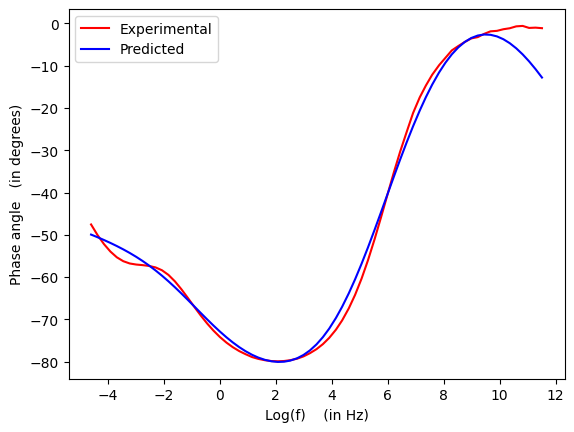

In [175]:
plt.plot(df_sp["log(f)"].values,df_sp["phase"].values,'r',label = 'Experimental')
plt.plot(df_sp["log(f)"].values,svr_model.predict(df_sp.drop(['XY','log(absZ)','phase'],axis=1)),'b',label='Predicted')
plt.legend()
plt.xlabel("Log(f)    (in Hz)")
plt.ylabel("Phase angle   (in degrees)")
plt.title('sp')
# plt.savefig('bode_svm_sp.png',dpi=1200)
plt.show()

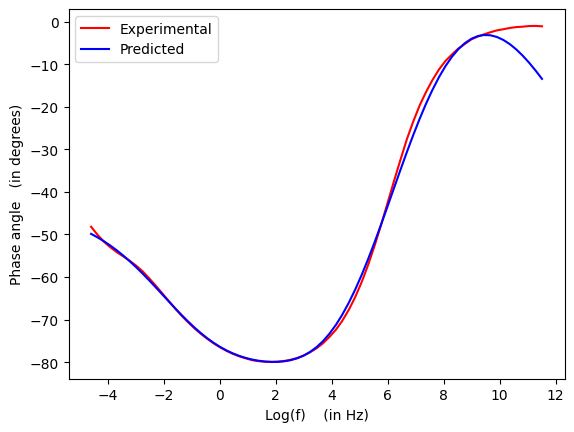

In [176]:
plt.plot(df_htsp["log(f)"].values,df_htsp["phase"].values,'r',label = 'Experimental')
plt.plot(df_htsp["log(f)"].values,svr_model.predict(df_htsp.drop(['XY','log(absZ)','phase'],axis=1)),'b',label='Predicted')
plt.legend()
plt.xlabel("Log(f)    (in Hz)")
plt.ylabel("Phase angle   (in degrees)")
plt.title('htsp')
#plt.savefig('bode_svm_htsp.png',dpi=1200)
plt.show()

## Fitting a Decision Tree

In [177]:
from sklearn import tree
dt_model = tree.DecisionTreeRegressor(max_depth=6)
dt_model.fit(x_train,y_train)
#R2
#MAE
#RMSE
print(r2_score(y_test,dt_model.predict(x_test)))
print(mean_absolute_error(y_test,dt_model.predict(x_test)))
print(sqrt(mean_squared_error(y_test,dt_model.predict(x_test))))

0.987825185136962
2.4709913751547137
3.3364462174439655


In [178]:
dt_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

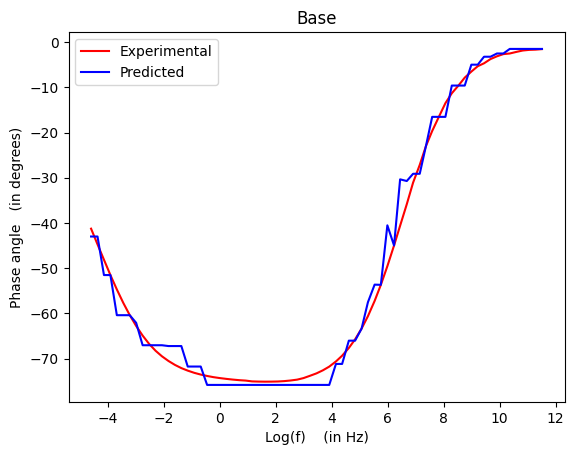

In [230]:
plt.plot(df_base["log(f)"].values,df_base["phase"].values,'r',label = 'Experimental')
plt.plot(df_base["log(f)"].values,dt_model.predict(df_base.drop(['XY','log(absZ)','phase'],axis=1)),'b',label='Predicted')
plt.legend()
plt.xlabel("Log(f)    (in Hz)")
plt.ylabel("Phase angle   (in degrees)")
plt.title('Base')
# plt.savefig('bode_dt_ab.png',dpi=1200)
plt.show()

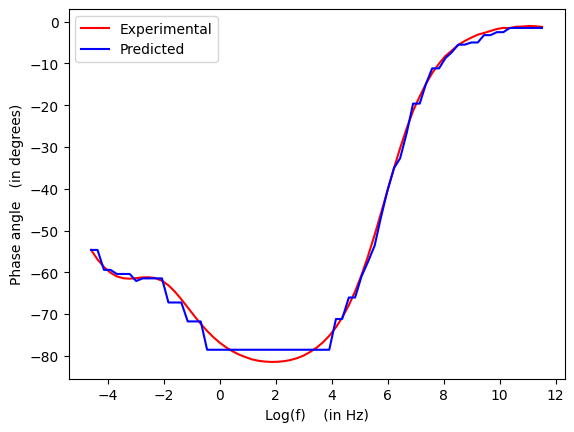

In [180]:
plt.plot(df_ht["log(f)"].values,df_ht["phase"].values,'r',label = 'Experimental')
plt.plot(df_ht["log(f)"].values,dt_model.predict(df_ht.drop(['XY','log(absZ)','phase'],axis=1)),'b',label='Predicted')
plt.legend()
plt.xlabel("Log(f)    (in Hz)")
plt.ylabel("Phase angle   (in degrees)")
plt.title('ht')
#plt.savefig('bode_dt_ht.png',dpi=1200)
plt.show()

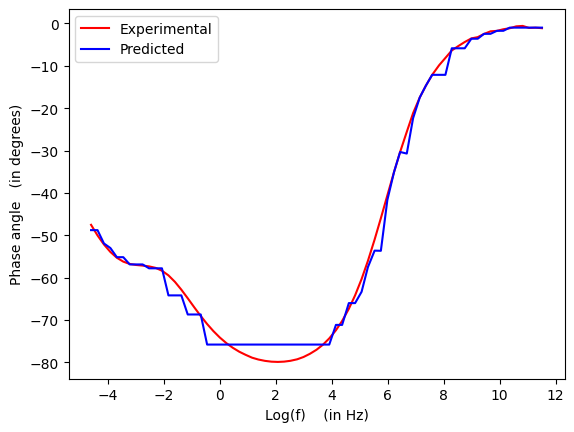

In [181]:
plt.plot(df_sp["log(f)"].values,df_sp["phase"].values,'r',label = 'Experimental')
plt.plot(df_sp["log(f)"].values,dt_model.predict(df_sp.drop(['XY','log(absZ)','phase'],axis=1)),'b',label='Predicted')
plt.legend()
plt.xlabel("Log(f)    (in Hz)")
plt.ylabel("Phase angle   (in degrees)")
plt.title('sp')
# plt.savefig('bode_dt_sp.png',dpi=1200)
plt.show()

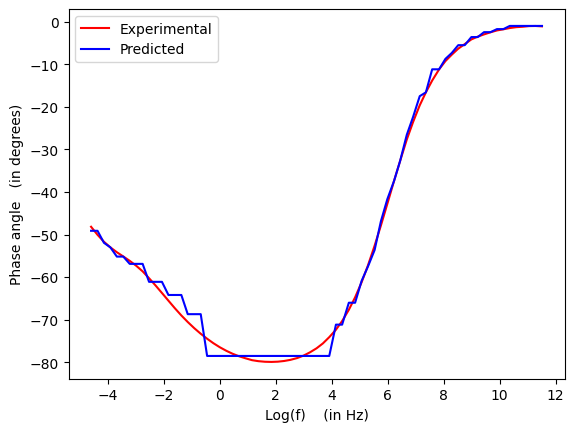

In [182]:
plt.plot(df_htsp["log(f)"].values,df_htsp["phase"].values,'r',label = 'Experimental')
plt.plot(df_htsp["log(f)"].values,dt_model.predict(df_htsp.drop(['XY','log(absZ)','phase'],axis=1)),'b',label='Predicted')
plt.legend()
plt.xlabel("Log(f)    (in Hz)")
plt.ylabel("Phase angle   (in degrees)")
plt.title('htsp')
# plt.savefig('bode_dt_htsp.png',dpi=1200)
plt.show()

## Fitting a Polynomial Regreesion

In [183]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

linear_model = LinearRegression()
degree=5
poly_model =make_pipeline(PolynomialFeatures(degree),LinearRegression())

poly_model.fit(x_train,y_train)
#R2
#MAE
#RMSE
print(r2_score(y_test,poly_model.predict(x_test)))
print(mean_absolute_error(y_test,poly_model.predict(x_test)))
print(sqrt(mean_squared_error(y_test,poly_model.predict(x_test))))

0.9844877184491735
3.275503030378593
3.7660907858869956


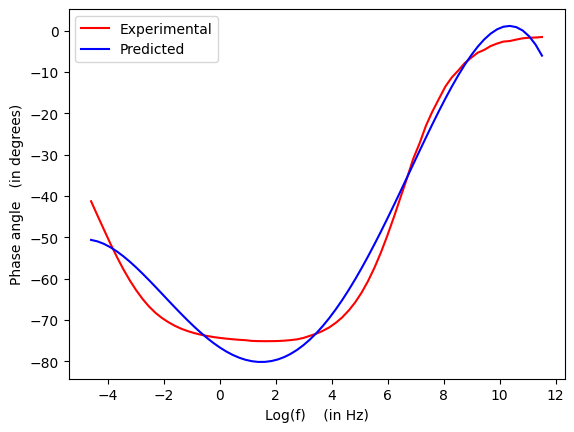

In [184]:
plt.plot(df_base["log(f)"].values,df_base["phase"].values,'r',label = 'Experimental')
plt.plot(df_base["log(f)"].values,poly_model.predict(df_base.drop(['XY','log(absZ)','phase'],axis=1)),'b',label='Predicted')
plt.legend()
plt.xlabel("Log(f)    (in Hz)")
plt.ylabel("Phase angle   (in degrees)")
plt.title('Base')
#plt.savefig('bode_poly_ab.png',dpi=1200)
plt.show()

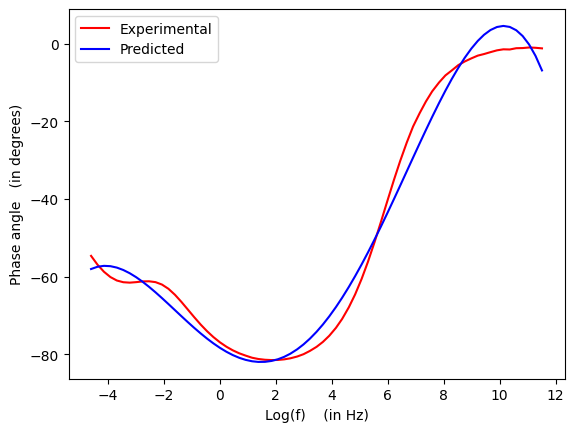

In [185]:
plt.plot(df_ht["log(f)"].values,df_ht["phase"].values,'r',label = 'Experimental')
plt.plot(df_ht["log(f)"].values,poly_model.predict(df_ht.drop(['XY','log(absZ)','phase'],axis=1)),'b',label='Predicted')
plt.legend()
plt.xlabel("Log(f)    (in Hz)")
plt.ylabel("Phase angle   (in degrees)")
plt.title('ht')
#plt.savefig('bode_poly_ht.png',dpi=1200)
plt.show()

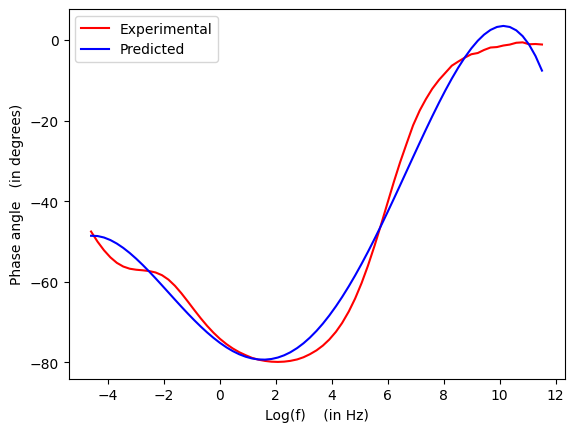

In [186]:
plt.plot(df_sp["log(f)"].values,df_sp["phase"].values,'r',label = 'Experimental')
plt.plot(df_sp["log(f)"].values,poly_model.predict(df_sp.drop(['XY','log(absZ)','phase'],axis=1)),'b',label='Predicted')
plt.legend()
plt.xlabel("Log(f)    (in Hz)")
plt.ylabel("Phase angle   (in degrees)")
plt.title('sp')
#plt.savefig('bode_poly_sp.png',dpi=1200)
plt.show()

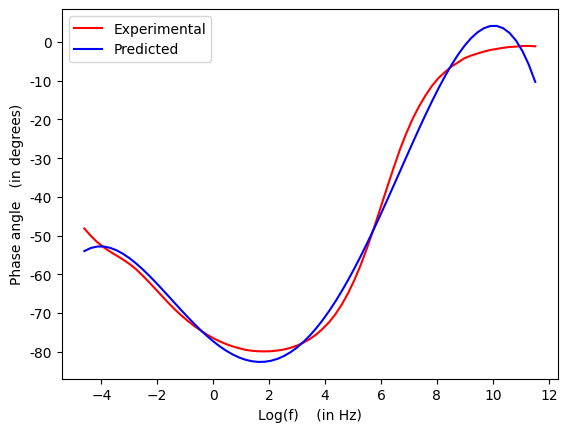

In [187]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)
fig, ax = plt.subplots()

# Make a plot with major ticks that are multiples of 20 and minor ticks that
# are multiples of 5.  Label major ticks with '%d' formatting but don't label
# minor ticks.


ax.plot(df_htsp["log(f)"].values,df_htsp["phase"].values,'r',label = 'Experimental')
ax.plot(df_htsp["log(f)"].values,poly_model.predict(df_htsp.drop(['XY','log(absZ)','phase'],axis=1)),'b',label='Predicted')

ax.yaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))

plt.legend()
plt.xlabel("Log(f)    (in Hz)")
plt.ylabel("Phase angle   (in degrees)")
plt.title('htsp')
#plt.savefig('bode_poly_htsp.png',dpi=1200)
plt.show()

## XGBoost Feature Importance

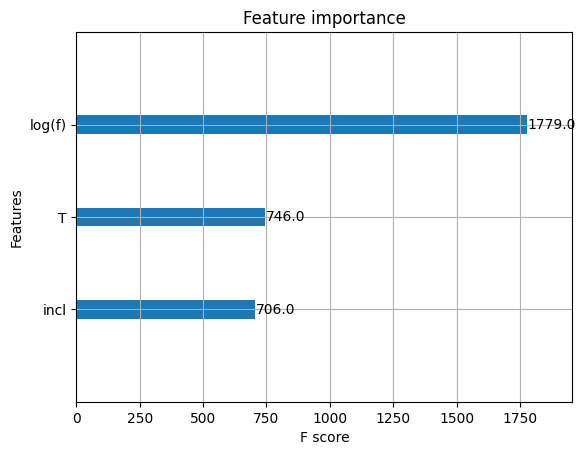

In [188]:
from xgboost import plot_importance
#reduction in mse
plot_importance(xgb_model)
plt.show()

Among the models considered, XGBoost performs the best. So we will do hyperparameter optimisation for XgBoost using Optuna
# Optuna For Hyperparameter Optimisation

In [189]:
import optuna

## Xgboost

In [190]:
def xgb_objective(trial):
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.15)
    param = {
        'silent': 1,
        'random_state': 0,
        'objective': 'reg:linear',
        'booster': trial.suggest_categorical('booster', ['gbtree', 'gblinear', 'dart']),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1.0),
        'n_estimators': trial.suggest_int('n_estimators',10,100),
        'learning_rate': trial.suggest_loguniform('learning_rste', 1e-4, 0.1),
        'max_depth':trial.suggest_int('max_depth',3,6)
    }
    bst = xgb.XGBRegressor(**param)
    bst.fit(train_x,train_y)
    return sqrt(mean_squared_error(test_y,bst.predict(test_x)))

In [191]:
SEED = 42

np.random.seed(SEED)
xgb_study = optuna.create_study(direction='minimize',sampler=optuna.samplers.TPESampler(seed=SEED),pruner=optuna.pruners.SuccessiveHalvingPruner())
xgb_study.optimize(xgb_objective, n_trials=100)

[I 2022-10-26 10:54:27,629] A new study created in memory with name: no-name-164e61a7-1991-45ae-867a-fd0b2c6f606f
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/

[10:54:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:54:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth", "silent" } might not be used.

  This could be a false alarm, with some parameters gettin

[I 2022-10-26 10:54:27,828] Trial 3 finished with value: 48.0711064915605 and parameters: {'booster': 'gblinear', 'reg_lambda': 0.011400863701127324, 'reg_alpha': 0.0234238498471129, 'n_estimators': 14, 'learning_rste': 0.006647135865318032, 'max_depth': 3}. Best is trial 3 with value: 48.0711064915605.
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1.0),
C

[10:54:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:54:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by lan

[I 2022-10-26 10:54:28,520] Trial 6 finished with value: 33.173161421469864 and parameters: {'booster': 'dart', 'reg_lambda': 0.12604664585649453, 'reg_alpha': 0.5727904470799616, 'n_estimators': 91, 'learning_rste': 0.00621870472776908, 'max_depth': 6}. Best is trial 6 with value: 33.173161421469864.
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1.0),
C:\

[10:54:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:54:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth", "silent" } might not be used.

  This could be a false alarm, with some parameters gettin

C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial

[10:54:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial

[10:54:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial

[10:54:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:54:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language binding

C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial

[10:54:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:54:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language binding

C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial

[10:54:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-10-26 10:54:30,388] Trial 16 finished with value: 25.882549514685977 and parameters: {'booster': 'gbtree', 'reg_lambda': 0.00043448667441846876, 'reg_alpha': 0.00035912972272153477, 'n_estimators': 48, 'learning_rste': 0.016958065310170203, 'max_depth': 5}. Best is trial 13 with value: 1.551859477078289.
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4

[10:54:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-10-26 10:54:30,722] Trial 17 finished with value: 49.45696326413482 and parameters: {'booster': 'gbtree', 'reg_lambda': 0.0029792429224694277, 'reg_alpha': 0.0077497527460463666, 'n_estimators': 56, 'learning_rste': 0.0025504532886261753, 'max_depth': 4}. Best is trial 13 with value: 1.551859477078289.
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 

[10:54:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-10-26 10:54:31,733] Trial 18 finished with value: 3.1817986505102147 and parameters: {'booster': 'gbtree', 'reg_lambda': 0.0002498569980417825, 'reg_alpha': 0.0017628724209196474, 'n_estimators': 83, 'learning_rste': 0.049030175610407074, 'max_depth': 6}. Best is trial 13 with value: 1.551859477078289.
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 

[10:54:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-10-26 10:54:32,343] Trial 19 finished with value: 54.17272702501002 and parameters: {'booster': 'gbtree', 'reg_lambda': 0.004656492842026578, 'reg_alpha': 0.0004785311541940043, 'n_estimators': 58, 'learning_rste': 0.0027859230107761044, 'max_depth': 5}. Best is trial 13 with value: 1.551859477078289.
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1

[10:54:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-10-26 10:54:32,925] Trial 20 finished with value: 37.85930400119308 and parameters: {'booster': 'dart', 'reg_lambda': 0.001077099205788552, 'reg_alpha': 0.00024947193918235317, 'n_estimators': 64, 'learning_rste': 0.006712353825366819, 'max_depth': 4}. Best is trial 13 with value: 1.551859477078289.
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1.0

[10:54:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial

[10:54:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial

[10:54:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial

[10:54:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial

[10:54:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:54:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language binding

[I 2022-10-26 10:54:34,102] Trial 26 finished with value: 2.9774372329072003 and parameters: {'booster': 'gbtree', 'reg_lambda': 0.0002966610118104968, 'reg_alpha': 0.002443967437414211, 'n_estimators': 67, 'learning_rste': 0.05246804510972082, 'max_depth': 4}. Best is trial 13 with value: 1.551859477078289.
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1.

[10:54:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-10-26 10:54:34,872] Trial 27 finished with value: 2.853822616607868 and parameters: {'booster': 'dart', 'reg_lambda': 0.00010022141624037439, 'reg_alpha': 0.0008766828160084475, 'n_estimators': 89, 'learning_rste': 0.03737553492355025, 'max_depth': 5}. Best is trial 13 with value: 1.551859477078289.
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1.0

[10:54:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial

[10:54:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:54:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language binding

[I 2022-10-26 10:54:35,473] Trial 30 finished with value: 60.520059784254585 and parameters: {'booster': 'gbtree', 'reg_lambda': 0.0007999706780514098, 'reg_alpha': 0.0005113030954918935, 'n_estimators': 47, 'learning_rste': 0.00011045407954753514, 'max_depth': 6}. Best is trial 13 with value: 1.551859477078289.
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4

[10:54:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-10-26 10:54:35,828] Trial 31 finished with value: 2.1345108418328462 and parameters: {'booster': 'gbtree', 'reg_lambda': 0.0002140742033927366, 'reg_alpha': 0.0001051374547778876, 'n_estimators': 94, 'learning_rste': 0.09261464587688391, 'max_depth': 5}. Best is trial 13 with value: 1.551859477078289.
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1

[10:54:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-10-26 10:54:36,135] Trial 32 finished with value: 1.3236637379242298 and parameters: {'booster': 'gbtree', 'reg_lambda': 0.00011209051119710595, 'reg_alpha': 0.00013313610748188896, 'n_estimators': 100, 'learning_rste': 0.061158895559970734, 'max_depth': 5}. Best is trial 32 with value: 1.3236637379242298.
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e

[10:54:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:54:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language binding

C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_loguniform('learning_rste', 1e-4, 0.1),
[I 2022-10-26 10:54:36,471] Trial 34 finished with value: 2.865875534923149 and parameters: {'booster': 'gbtree', 'reg_lambda': 0.00016370820084232596, 'reg_alpha': 0.042739184421278394, 'n_estimators': 73, 'learning_rste': 0.061229498192911035, 'max_depth': 4}. Best is trial 32 with value: 1.32366

[10:54:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-10-26 10:54:38,520] Trial 35 finished with value: 4.355161968798765 and parameters: {'booster': 'dart', 'reg_lambda': 0.001853355092068398, 'reg_alpha': 0.00033288065112747195, 'n_estimators': 94, 'learning_rste': 0.02877200274887634, 'max_depth': 5}. Best is trial 32 with value: 1.3236637379242298.
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1.0

[10:54:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial

[10:54:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial

[10:54:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-10-26 10:54:39,721] Trial 38 finished with value: 6.60768547295138 and parameters: {'booster': 'dart', 'reg_lambda': 0.017428252765214848, 'reg_alpha': 0.0005038973139490449, 'n_estimators': 91, 'learning_rste': 0.023552389172810242, 'max_depth': 6}. Best is trial 32 with value: 1.3236637379242298.
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1.0)

[10:54:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:54:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by lan

C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial

[10:54:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:54:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language binding

C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial

[10:54:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:54:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by lan

C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_loguniform('learning_rste', 1e-4, 0.1),
[I 2022-10-26 10:54:40,772] Trial 44 finished with value: 19.516453502706018 and parameters: {'booster': 'gblinear', 'reg_lambda': 0.34631118083759177, 'reg_alpha': 0.0014171756069130499, 'n_estimators': 100, 'learning_rste': 0.07045286630023476, 'max_depth': 4}. Best is trial 32 with value: 1.3236637379242298.
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambd

[10:54:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:54:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language binding

C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial

[10:54:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:54:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by lan

[I 2022-10-26 10:54:41,481] Trial 48 finished with value: 28.597730854217378 and parameters: {'booster': 'gblinear', 'reg_lambda': 0.04541915088544825, 'reg_alpha': 0.0022419926536147794, 'n_estimators': 73, 'learning_rste': 0.031315767092439474, 'max_depth': 5}. Best is trial 32 with value: 1.3236637379242298.
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4,

[10:54:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:54:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language binding

C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial

[10:54:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:54:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language binding

[I 2022-10-26 10:54:42,502] Trial 52 finished with value: 1.944408985255725 and parameters: {'booster': 'gbtree', 'reg_lambda': 0.00021172057143248877, 'reg_alpha': 0.113688500872993, 'n_estimators': 90, 'learning_rste': 0.0523980625331447, 'max_depth': 5}. Best is trial 32 with value: 1.3236637379242298.
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1.0),

[10:54:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial

[10:54:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:54:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language binding

C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_loguniform('learning_rste', 1e-4, 0.1),
[I 2022-10-26 10:54:43,079] Trial 55 finished with value: 3.8593215914331456 and parameters: {'booster': 'gbtree', 'reg_lambda': 0.0002549303503194195, 'reg_alpha': 0.00013437751404618206, 'n_estimators': 87, 'learning_rste': 0.03142558811665837, 'max_depth': 4}. Best is trial 32 with value: 1.3236

[10:54:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:54:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language binding

C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial

[10:54:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:54:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by lan

C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial

[10:54:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:54:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language binding

[I 2022-10-26 10:54:44,050] Trial 61 finished with value: 2.9240146434035386 and parameters: {'booster': 'gbtree', 'reg_lambda': 0.00014032350313578643, 'reg_alpha': 0.00010021467942457582, 'n_estimators': 42, 'learning_rste': 0.0803110700015392, 'max_depth': 5}. Best is trial 32 with value: 1.3236637379242298.
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4,

[10:54:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:54:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language binding

C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial

[10:54:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial

[10:54:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:54:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language binding

C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial

[10:54:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:54:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language binding

C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial

[10:54:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:54:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language binding

C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial

[10:54:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial

[10:54:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial

[10:54:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:54:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language binding

C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial

[10:54:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial

[10:54:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:54:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language binding

[I 2022-10-26 10:54:47,973] Trial 77 finished with value: 2.279058560986133 and parameters: {'booster': 'gbtree', 'reg_lambda': 0.00014841039903299954, 'reg_alpha': 0.0001012712998548496, 'n_estimators': 53, 'learning_rste': 0.09993809801318225, 'max_depth': 5}. Best is trial 32 with value: 1.3236637379242298.
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 

[10:54:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:54:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by lan

[I 2022-10-26 10:54:48,320] Trial 79 finished with value: 40.80351812333852 and parameters: {'booster': 'gbtree', 'reg_lambda': 0.0001781070736151972, 'reg_alpha': 0.0003227170287312893, 'n_estimators': 78, 'learning_rste': 0.0037881220620220825, 'max_depth': 6}. Best is trial 32 with value: 1.3236637379242298.
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4,

[10:54:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-10-26 10:54:48,829] Trial 80 finished with value: 52.04086807686057 and parameters: {'booster': 'dart', 'reg_lambda': 0.0002270172326615353, 'reg_alpha': 0.0005375511633332578, 'n_estimators': 92, 'learning_rste': 0.0008810489292384509, 'max_depth': 5}. Best is trial 32 with value: 1.3236637379242298.
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1

[10:54:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:54:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial

[10:54:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial

[10:54:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-10-26 10:54:49,595] Trial 83 finished with value: 1.9665005320714604 and parameters: {'booster': 'gbtree', 'reg_lambda': 0.00016177385827938337, 'reg_alpha': 0.00020907626976850424, 'n_estimators': 98, 'learning_rste': 0.08424655294206564, 'max_depth': 5}. Best is trial 32 with value: 1.3236637379242298.
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4

[10:54:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-10-26 10:54:49,936] Trial 84 finished with value: 2.885567537937657 and parameters: {'booster': 'gbtree', 'reg_lambda': 0.00010047890910635824, 'reg_alpha': 0.0001294754904811744, 'n_estimators': 95, 'learning_rste': 0.07157791075328392, 'max_depth': 5}. Best is trial 32 with value: 1.3236637379242298.
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 

[10:54:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:54:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language binding

C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_loguniform('learning_rste', 1e-4, 0.1),
[I 2022-10-26 10:54:50,354] Trial 86 finished with value: 2.3656691653869113 and parameters: {'booster': 'gbtree', 'reg_lambda': 0.00013468236234555946, 'reg_alpha': 0.00016672510544376372, 'n_estimators': 91, 'learning_rste': 0.04020669434924537, 'max_depth': 5}. Best is trial 32 with value: 1.323

[10:54:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:54:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language binding

C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial

[10:54:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:54:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language binding

C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial

[10:54:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial

[10:54:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-10-26 10:54:51,635] Trial 92 finished with value: 2.7252012994786985 and parameters: {'booster': 'gbtree', 'reg_lambda': 0.00017106362737451134, 'reg_alpha': 0.0002162381144172043, 'n_estimators': 94, 'learning_rste': 0.07101095687762153, 'max_depth': 5}. Best is trial 32 with value: 1.3236637379242298.
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4,

[10:54:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-10-26 10:54:51,931] Trial 93 finished with value: 1.8529079160749822 and parameters: {'booster': 'gbtree', 'reg_lambda': 0.00015538105064328734, 'reg_alpha': 0.0007288893831838827, 'n_estimators': 90, 'learning_rste': 0.05319316928380842, 'max_depth': 5}. Best is trial 32 with value: 1.3236637379242298.
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4,

[10:54:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial

[10:54:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial

[10:54:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:54:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by lan

[I 2022-10-26 10:54:52,816] Trial 97 finished with value: 1.4351661541551566 and parameters: {'booster': 'gbtree', 'reg_lambda': 0.01713885632791674, 'reg_alpha': 0.0005130943332529334, 'n_estimators': 98, 'learning_rste': 0.08449265168318869, 'max_depth': 5}. Best is trial 32 with value: 1.3236637379242298.
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1.

[10:54:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1.0),
C:\Users\A\AppData\Local\Temp\ipykernel_14492\3369461576.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial

[10:54:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [236]:
from typing import Callable
from typing import Optional

import numpy as np

from optuna._experimental import experimental
from optuna.logging import get_logger
from optuna.study import Study
from optuna.study import StudyDirection
from optuna.trial import FrozenTrial
from optuna.trial import TrialState
from optuna.visualization._utils import _check_plot_args
from optuna.visualization.matplotlib._matplotlib_imports import _imports


if _imports.is_successful():
    from optuna.visualization.matplotlib._matplotlib_imports import Axes
    from optuna.visualization.matplotlib._matplotlib_imports import plt

_logger = get_logger(__name__)

ImportError: cannot import name 'experimental' from 'optuna._experimental' (C:\Users\A\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\optuna\_experimental.py)

In [ ]:
def optimization_history(
    study: Study,
    *,
    target: Optional[Callable[[FrozenTrial], float]] = None,
    target_name: str = "Objective Value",
) -> "Axes":
    """Plot optimization history of all trials in a study with Matplotlib.
    .. seealso::
        Please refer to :func:`optuna.visualization.plot_optimization_history` for an example.
    Example:
        The following code snippet shows how to plot optimization history.
        .. plot::
            import optuna
            def objective(trial):
                x = trial.suggest_float("x", -100, 100)
                y = trial.suggest_categorical("y", [-1, 0, 1])
                return x ** 2 + y
            sampler = optuna.samplers.TPESampler(seed=10)
            study = optuna.create_study(sampler=sampler)
            study.optimize(objective, n_trials=10)
            optuna.visualization.matplotlib.plot_optimization_history(study)
    Args:
        study:
            A :class:`~optuna.study.Study` object whose trials are plotted for their target values.
        target:
            A function to specify the value to display. If it is :obj:`None` and ``study`` is being
            used for single-objective optimization, the objective values are plotted.
            .. note::
                Specify this argument if ``study`` is being used for multi-objective optimization.
        target_name:
            Target's name to display on the axis label and the legend.
    Returns:
        A :class:`matplotlib.axes.Axes` object.
    Raises:
        :exc:`ValueError`:
            If ``target`` is :obj:`None` and ``study`` is being used for multi-objective
            optimization.
    """

    _imports.check()
    _check_plot_args(study, target, target_name)
    get_optimization_history_plot(study, target, target_name)
    return 0


def get_optimization_history_plot(
    study: Study,
    target: Optional[Callable[[FrozenTrial], float]],
    target_name: str,
) -> "Axes":

    # Set up the graph style.
    fig = plt.figure()
    plt.title("Optimization History Plot")
    plt.xlabel("#Trials")
    plt.ylabel(target_name)
    
    # Prepare data for plotting.
    trials = [t for t in study.trials if t.state == TrialState.COMPLETE]

    if len(trials) == 0:
        _logger.warning("Study instance does not contain trials.")
        return 0

    # Draw a scatter plot and a line plot.
    if target is None:
        if study.direction == StudyDirection.MINIMIZE:
            best_values = np.minimum.accumulate([t.value for t in trials])
        else:
            best_values = np.maximum.accumulate([t.value for t in trials])
        plt.scatter(
            x=[t.number for t in trials],
            y=[t.value for t in trials],
            color='blue',
            alpha=1,
            label=target_name,
        )
        plt.plot(
            [t.number for t in trials],
            best_values,
            marker="o",
            color='red',
            alpha=0.5,
            label="Best Value",
        )

        plt.legend()
    else:
        plt.scatter(
            x=[t.number for t in trials],
            y=[target(t) for t in trials],
            color='red',
            alpha=1,
            label=target_name,
        )
    plt.savefig('bode_opt_his.png',dpi = 1200,bbox_inches='tight')
    plt.show()
    

In [ ]:
optimization_history(xgb_study)

In [ ]:
xgb_study.best_params

In [ ]:
bst_params = {'booster': 'gbtree',
 'reg_lambda': 0.004000806203116893,
 'reg_alpha': 0.003689896166381573,
 'n_estimators': 84,
 'learning_rste': 0.08476142316168266,
 'max_depth': 5}

In [ ]:
final_model = xgb.XGBRegressor(**bst_params)
final_model.fit(x_train,y_train)

In [ ]:
print(r2_score(y_test,final_model.predict(x_test)))
print(mean_absolute_error(y_test,final_model.predict(x_test)))
print(sqrt(mean_squared_error(y_test,final_model.predict(x_test))))

In [ ]:
final_model.feature_importances_

In [ ]:
columns = ['log(f)', 'T','incl']

In [ ]:
gain = np.array([0.98645735, 0.00622593,0.00731668],
      dtype='float32')

In [ ]:
def _label_barh(bars, text_format, **kwargs):
    """
    Attach a text label to each bar displaying its y value
    Note: label always outside. otherwise it's too hard to control as numbers can be very long
    """
    max_x_value = 1.0
    distance = max_x_value * 0.0025

    for bar in bars:
        text = text_format.format(bar.get_width())

        text_x = bar.get_width() + distance
        text_y = bar.get_y() + bar.get_height() / 2

        plt.text(text_x, text_y, text, va='center', **kwargs)

def label_bars(bars, text_format, **kwargs):
    """
    Attaches a label on every bar of a regular or horizontal bar chart
    """
    ys = [bar.get_y() for bar in bars]
    y_is_constant = all(y == ys[0] for y in ys)  # -> regular bar chart, since all all bars start on the same y level (0)

    if y_is_constant:
        _label_bar(bars, text_format, **kwargs)
    else:
        _label_barh(bars, text_format, **kwargs)

In [ ]:
horizontal_bars = plt.barh(columns, gain, height= 0.5, align="center")
plt.xlim(0,1.0)
plt.ylabel('Features')
plt.xlabel('Importance')
value_format = "{:.4}"  # displaying values as percentage with one fractional digit
label_bars(horizontal_bars, value_format)

## Hyperparameter-Optimized XGboost plots

In [ ]:
plt.plot(df_base["log(f)"].values,df_base["phase"].values,'r',label = 'Experimental')
plt.plot(df_base["log(f)"].values,final_model.predict(df_base.drop(['XY','log(absZ)','phase'],axis=1)),'b',label='Predicted')
plt.legend()
plt.xlabel("Log(f)    (in Hz)")
plt.ylabel("Phase angle   (in degrees)")
plt.title('Base')
#plt.savefig('bode_xgb_ab.png',dpi=1200)
plt.show()

In [ ]:
plt.plot(df_ht["log(f)"].values,df_ht["phase"].values,'r',label = 'Experimental')
plt.plot(df_ht["log(f)"].values,final_model.predict(df_ht.drop(['XY','log(absZ)','phase'],axis=1)),'b',label='Predicted')
plt.legend()
plt.xlabel("Log(f)    (in Hz)")
plt.ylabel("Phase angle   (in degrees)")
plt.title('Base')
#plt.savefig('bode_xgb_ht.png',dpi=1200)
plt.show()

In [ ]:
plt.plot(df_sp["log(f)"].values,df_sp["phase"].values,'r',label = 'Experimental')
plt.plot(df_sp["log(f)"].values,final_model.predict(df_sp.drop(['XY','log(absZ)','phase'],axis=1)),'b',label='Predicted')
plt.legend()
plt.xlabel("Log(f)    (in Hz)")
plt.ylabel("Phase angle   (in degrees)")
plt.title('Base')
#plt.savefig('bode_xgb_sp.png',dpi=1200)
plt.show()

In [ ]:
plt.plot(df_htsp["log(f)"].values,df_htsp["phase"].values,'r',label = 'Experimental')
plt.plot(df_htsp["log(f)"].values,final_model.predict(df_htsp.drop(['XY','log(absZ)','phase'],axis=1)),'b',label='Predicted')
plt.legend()
plt.xlabel("Log(f)    (in Hz)")
plt.ylabel("Phase angle   (in degrees)")
plt.title('Base')
#plt.savefig('bode_xgb_htsp.png',dpi=1200)
plt.show()